In [1]:
from PIL import Image, ImageDraw

In [2]:
# notes (textual)
notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] # octave note names
notes_next_octave = [note + "_up1" for note in notes] # and 1 octave up, total of 24 semitones

# note to octave position mapping
note_mapping = {k:v for (k,v) in zip(notes+notes_next_octave, range(1,25))}

# octave position to note mapping
inv_mapping = {v:k for (k,v) in note_mapping.items()}

# boolean masks for note presence in popular scales
scale_masks = {
    
    'chromatic': [True] * 13, # oh, that's easy one to code :)
    
    'major-natural': [True, False, True, False, True, 
                      True, False, True, False, True, False, True, True],
    
    'major-pentatonic': [True, False, True, False, True, 
                         False, False, True, False, True, False, False, True],
    
    'major-rocknroll': [True, False, True, True, True, 
                        False, False, True, True, True, False, False, True],
    
    'minor': [True, False, True, True, False, 
              True, False, True, True, False, True, False, True],
    
    'minor-melodic': [True, False, True, True, False,
                      True, False, True, False, True, False, True, True],
    
    'minor-harmonic': [True, False, True, True, False, 
                       True, False, True, True, False, False, True, True],
    
    'minor-pentatonic': [True, False, False, True, False, 
                         True, False, True, False, False, True, False, True],
    
    'minor-blues': [True, False, False, True, False, 
                    True, True, True, False, False, True, False, True]
}

In [3]:
# supportive function
def get_scale(root_note=1, scale='major', view='textual'):
    """
    Function to get notes in specified scale. Supports both textual and numerical note output.
    
    params:
        root_note: int, [1-12] inclusive, or string [international note name]
        scale: str
            scale to build for, supports 'major', 'minor', 'minor-harmonic', etc.
        view: str, default = 'textual'
            whether to return position-based or textual-based scale, 
            'textual' for textual, position-based otherwise
    returns:
        result: list 
            note positions / list of note names, depending on 'view' param 
    """
    if type(root_note) == str:
        try:
            root_note = note_mapping[root_note.upper()]
        except KeyError:
            print('Wrong textual root note specified, check input!')
            return []
    
    assert 1 <= root_note <= 12 and type(root_note) == int, 'root note between 1 and 12'
    
    # indexes, from choosen root note through 12 semitones to the same note 1 octave higher
    base = list(range(root_note, root_note + 13))
    # get boolean mask for selected scale
    try:
        mask = scale_masks[scale]
    except KeyError:
        print('Oops, unsupported or misspelled scale!')
        return []
    # return note names / note indexes, based on 'view' param
    if view == 'textual':
        return [inv_mapping[note] for (note,use) in zip(base,mask) if use]
    else:
        return [note for (note,use) in zip(base,mask) if use]

In [4]:
# usage example
get_scale(root_note='F#', scale='minor', view='textual')

['F#', 'G#', 'A', 'B', 'C#_up1', 'D_up1', 'E_up1', 'F#_up1']

In [5]:
# visualize specified scale
def visualize_scale(root_note='ми', scale='minor'):
    """
    Function to visualize notes of specified scale on keyboard.
    
    params:
        root_note: int, [1-12] inclusive, or string [note name in russian]
        scale: str
            scale to build for, supports 'major', 'minor', 'minor-harmonic'
    returns:
        picture: entity of PIL.Image class 
            grayscale picture with note positions, drawn over keyboard background 
    """
    # get note indexes for selected scale
    sc = get_scale(root_note=root_note, scale=scale, view='digits')
    # open background image with piano keyboard
    im = Image.open("piano-2-octaves.jpg")

    eX, eY = 25, 25 # bounding box size (for circles)
    
    # shifts of circle positions on the background
    hshift_white, hshift_black = 52.5, 20 # horizontal
    vshift_white, vshift_black = 180, 65 # vertical
    # 2-octaved white keys indexes (starts from 1)
    white_keys = [1, 3, 5, 6, 8, 10, 12, 13, 15, 17, 18, 20, 22, 24]
    # same for black keys
    black_keys = [i for i in range(1, 24) if i not in white_keys]
    
    # define places (bounding boxes) to draw circles in
    # places for 14 white keys (7+7)
    bboxes_white = [
        (28 + hshift_white*i - eX/2, vshift_white - eY/2, 
         28 + hshift_white*i + eX/2, vshift_white + eY/2) for i in range(0, 14)]
    # create dict with mapping - note position <-> circle boundaries
    bboxes = {k:v for (k,v) in zip(white_keys, bboxes_white)}
    # places for 10 black keys (5+5)
    bboxes_black = [
        (55 + hshift_white*i - eX/2, vshift_black - eY/2, 
         55 + hshift_white*i + eX/2, vshift_black + eY/2) 
        for i in [0,1,3,4,5, 7,8,10,11,12]]
    # update mapping dict with black keys
    bboxes.update({k:v for (k,v) in zip(black_keys, bboxes_black)})
    
    # create draw object
    draw = ImageDraw.Draw(im)
    # choose circles to draw (based on selected scale)
    if sc:
        scale_bboxes = [bboxes[k] for k in sc]
        # print circle  for each note in selected scale
        for bbox in scale_bboxes:
            draw.ellipse(bbox, fill=170, outline=100)
    return im

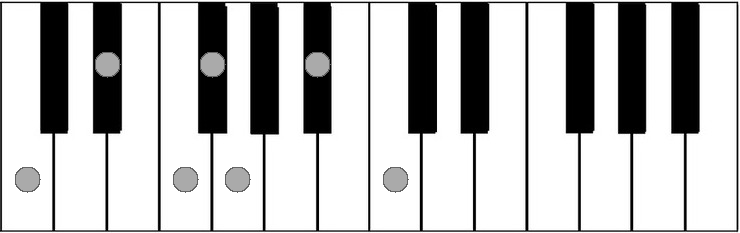

In [6]:
# usage example
visualize_scale(root_note='c', scale='minor-blues')

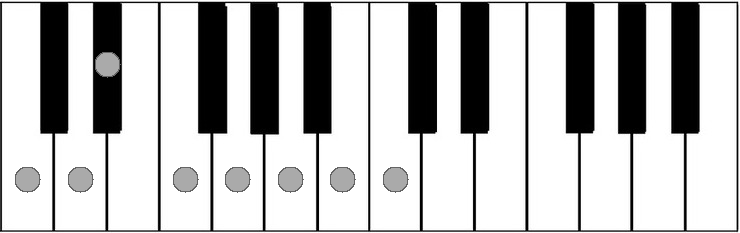

In [9]:
# usage example
visualize_scale(root_note='C', scale='minor-melodic')